In [2]:
data=pd.read_csv("../data/Eng_split_with_id.csv") ##
data=data[['_id','company_description','company_industry','company_sector']]

In [3]:
data['company_sector'].value_counts()

Technology                     158173
Professional Services          154421
Financial Services              48298
Retail and CPG                  48009
Industrials & Chemicals         38628
Healthcare and Lifesciences     37803
Media and Telecom               28820
Energy and Utilities            11383
Name: company_sector, dtype: int64

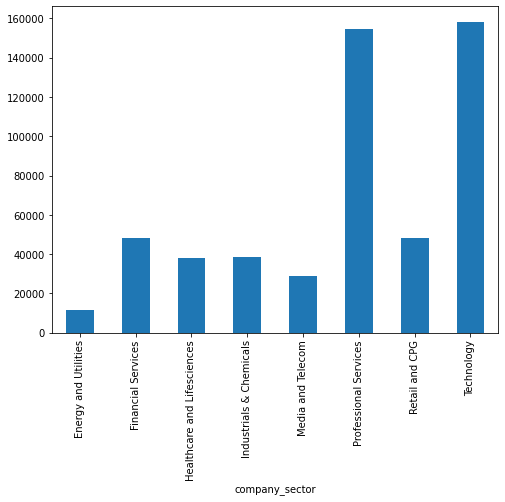

In [4]:
fig = plt.figure(figsize=(8,6))
data.groupby('company_sector').company_description.count().plot.bar()
plt.show()

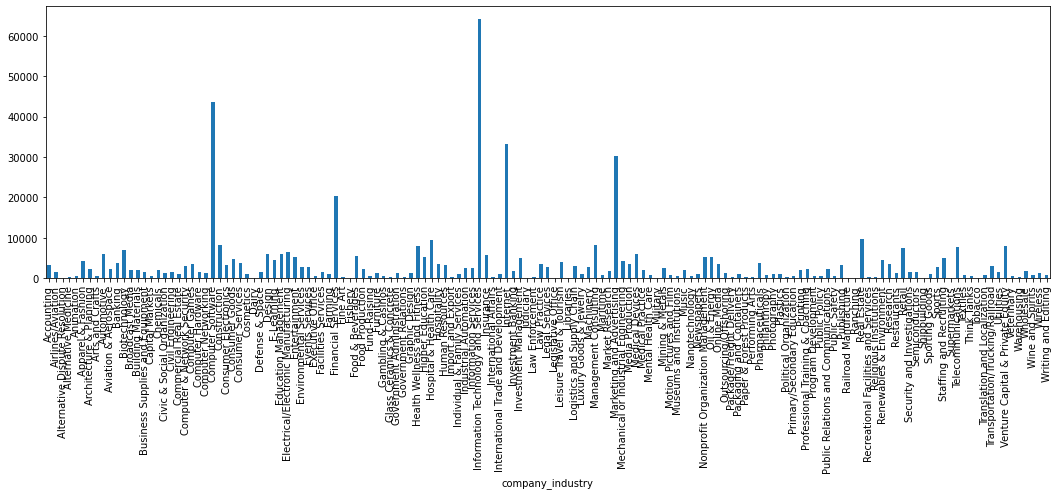

In [5]:
fig = plt.figure(figsize=(18,5))
data.groupby('company_industry').company_description.count().plot.bar()
plt.show()

In [6]:
data['company_industry'].value_counts()

Information Technology and Services    64089
Computer Software                      43560
Internet                               33201
Marketing and Advertising              30265
Financial Services                     20419
                                       ...  
Tobacco                                   62
Alternative Dispute Resolution            52
Ranching                                  37
Judiciary                                 29
Legislative Office                        18
Name: company_industry, Length: 147, dtype: int64

In [7]:
def get_bar_and_percent(df,column_name,y_label,x_label):
    
    print("\n\n ****** Percentage Wise Variable Distribution ********* \n")
    print(df[column_name].value_counts(normalize=True)*100)   # percentage wise
    if df[column_name].nunique()<70:
        print("\n\n ****** Bar Graph for - "+column_name+" ******\n")
        fig = plt.figure(figsize = (15, 5))
        # creating the bar plot
        df[column_name].value_counts(normalize=False).plot.bar(title = column_name) 
        plt.xlabel(x_label)
        plt.ylabel(y_label)
        plt.show()
    else:
        c = df[column_name].nunique()
        print("\n ------------ Number of Unique entries: "+str(c)+"  are too large to display ------------\n")
        print("\n ------------  Single Random Row  ------------\n", df[column_name][0])
    
    return True

In [8]:
get_bar_and_percent(data,"company_industry","Frequency","Categories in company_industry")



 ****** Percentage Wise Variable Distribution ********* 

Information Technology and Services    12.195001
Computer Software                       8.288696
Internet                                6.317562
Marketing and Advertising               5.758893
Financial Services                      3.885374
                                         ...    
Tobacco                                 0.011798
Alternative Dispute Resolution          0.009895
Ranching                                0.007040
Judiciary                               0.005518
Legislative Office                      0.003425
Name: company_industry, Length: 147, dtype: float64

 ------------ Number of Unique entries: 147  are too large to display ------------


 ------------  Single Random Row  ------------
 Information Technology and Services


True



 ****** Percentage Wise Variable Distribution ********* 

Technology                     30.097520
Professional Services          29.383581
Financial Services              9.190254
Retail and CPG                  9.135262
Industrials & Chemicals         7.350224
Healthcare and Lifesciences     7.193241
Media and Telecom               5.483935
Energy and Utilities            2.165983
Name: company_sector, dtype: float64


 ****** Bar Graph for - company_sector ******



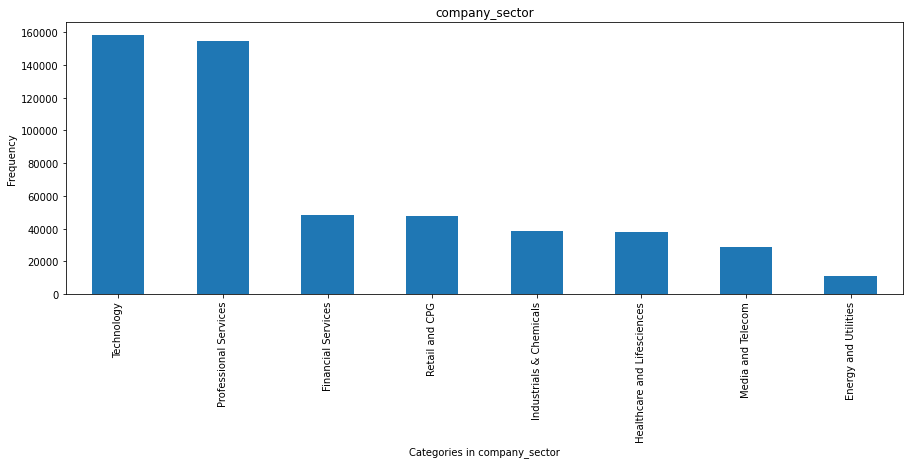

True

In [9]:
get_bar_and_percent(data,"company_sector","Frequency","Categories in company_sector")

In [10]:
len(data)

525535

In [11]:
import math
def data_Splitter(df,column_name,data_len):
    print(len(df))
    data=pd.DataFrame()
    for i in df[column_name].unique():
        i_df = df.loc[df[column_name]==i]
        val = math.ceil((len(i_df)/len(df))*data_len)
        i_df = i_df.sample(n=val)
        data=data.append(i_df)
    data.reset_index(drop=True,inplace=True)
    return data

In [12]:
smaller_data = data_Splitter(data,'company_industry',50000)

525535


In [13]:
smaller_data.shape

(50074, 4)

In [14]:
smaller_data

,_id,company_description,company_industry,company_sector
0,5ba5edf17c86660ac1277389,"Founded in 2005 by Art Howe, CIU Networks INC ...",Information Technology and Services,Technology
1,5ba8ab4a7c866639437d4223,Pulling your hair out over mindless call after...,Information Technology and Services,Technology
2,5ba5ef497c86660ac12a31f6,Creative Facility Design can recommend alterna...,Information Technology and Services,Technology
3,5ba70d9540437e5d2c69af56,PVM Innvensys Pvt Ltd is an information techno...,Information Technology and Services,Technology
4,5ba5f2e77c86660ac13009ea,Eleview International Inc is an information te...,Information Technology and Services,Technology
...,...,...,...,...
50069,5c3b0525d55ae49f1b7d4047,Office of Rep. James P. McGovern is a represen...,Legislative Office,Professional Services
50070,5c3b06cdd55ae49f1b7fb887,The Joint Economic Committee (JEC) was created...,Legislative Office,Professional Services
50071,5c3b0402d55ae49f1b7bb343,The International Court of Justice (ICJ) is th...,Judiciary,Professional Services
50072,5c3b06d7d55ae49f1b7fc803,Middle district of florida web site provides i...,Judiciary,Professional Services


In [1]:
import pandas as pd
import numpy as np
import nltk
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from nltk.stem.porter import PorterStemmer

from sklearn.model_selection import cross_val_score
import re
import codecs
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
smaller_data=pd.read_csv("50k_data_crunchbase.csv")

In [2]:
train, test = train_test_split(smaller_data, test_size=0.2)

In [3]:
len(train),len(test)

(40059, 10015)

In [4]:
#removing non-letter symbols and converting text in 'converted_text' to lowercase 
train['company_description'] = train['company_description'].apply(lambda x: "".join(re.sub(r"[^A-Za-z\s]", '',str(x))))
test['company_description'] = test['company_description'].apply(lambda x: "".join(re.sub(r"[^A-Za-z\s]",'',str(x))))
train['company_description'] = train['company_description'].apply(lambda x: " ".join(x.lower() for x in x.split()))
test['company_description'] = test['company_description'].apply(lambda x: " ".join(x.lower() for x in x.split()))

<ipython-input-4-f7453b2fc4a1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['company_description'] = train['company_description'].apply(lambda x: "".join(re.sub(r"[^A-Za-z\s]", '',str(x))))
<ipython-input-4-f7453b2fc4a1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['company_description'] = test['company_description'].apply(lambda x: "".join(re.sub(r"[^A-Za-z\s]",'',str(x))))
<ipython-input-4-f7453b2fc4a1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

In [5]:
#Removing punctuations
#adding characters list which needs to remove that is PUNCTUATION
punc = ['.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}',"%",'/','<','>','br','�','^','XX','XXXX','xxxx','xx']
#removing extra characters
train['company_description'] = train['company_description'].apply(lambda x: " ".join(x for x in x.split() if x not in punc))
test['company_description'] = test['company_description'].apply(lambda x: " ".join(x for x in x.split() if x not in punc))

<ipython-input-5-78926681a0a7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['company_description'] = train['company_description'].apply(lambda x: " ".join(x for x in x.split() if x not in punc))
<ipython-input-5-78926681a0a7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['company_description'] = test['company_description'].apply(lambda x: " ".join(x for x in x.split() if x not in punc))


In [6]:
#removal of stopwords
from nltk.corpus import stopwords
stop = stopwords.words('english')
train['company_description'] = train['company_description'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
test['company_description'] = test['company_description'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

<ipython-input-6-c008e710120b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['company_description'] = train['company_description'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
<ipython-input-6-c008e710120b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['company_description'] = test['company_description'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))


In [7]:
#common words removal
freq_train = pd.Series(' '.join(train['company_description']).split()).value_counts()[:10]
freq_test = pd.Series(' '.join(test['company_description']).split()).value_counts()[:10]
freq_train = list(freq_train.index)
train['company_description'] = train['company_description'].apply(lambda x: " ".join(x for x in x.split() if x not in freq_train))
freq_test = list(freq_test.index)
test['company_description'] = test['company_description'].apply(lambda x: " ".join(x for x in x.split() if x not in freq_test))

<ipython-input-7-e60ef871d55f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['company_description'] = train['company_description'].apply(lambda x: " ".join(x for x in x.split() if x not in freq_train))
<ipython-input-7-e60ef871d55f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['company_description'] = test['company_description'].apply(lambda x: " ".join(x for x in x.split() if x not in freq_test))


In [8]:
#rare words removal
freq_train_rare = pd.Series(' '.join(train['company_description']).split()).value_counts()[-10:]
freq_train_rare = list(freq_train_rare.index)
train['company_description'] = train['company_description'].apply(lambda x: " ".join(x for x in x.split() if x not in freq_train_rare))
freq_test_rare = pd.Series(' '.join(test['company_description']).split()).value_counts()[-10:]
freq_test_rare = list(freq_test_rare.index)
test['company_description'] = test['company_description'].apply(lambda x: " ".join(x for x in x.split() if x not in freq_test_rare))

<ipython-input-8-14715e3d907c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['company_description'] = train['company_description'].apply(lambda x: " ".join(x for x in x.split() if x not in freq_train_rare))
<ipython-input-8-14715e3d907c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['company_description'] = test['company_description'].apply(lambda x: " ".join(x for x in x.split() if x not in freq_test_rare))


In [ ]:
#STEMMING
st = PorterStemmer()
train['company_description']=train['company_description'].apply(lambda x: " ".join([st.stem(w) for w in x.split()]))
test['company_description']=test['company_description'].apply(lambda x: " ".join([st.stem(w) for w in x.split()]))

<ipython-input-9-e5c7e1156739>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['company_description']=train['company_description'].apply(lambda x: " ".join([st.stem(w) for w in x.split()]))


In [ ]:
def x_data(dataset):
    X = dataset.loc[:,['Transaction-Type',,'Consumer-disputes','delayed','converted_text','convertion_language']]
    
    #LabelEncoding the categorical features
    labelencoder = LabelEncoder()
    labelencoder.fit(X.iloc[:,0].values)
    X.iloc[:,0]=labelencoder.transform(X.iloc[:,0])
    labelencoder.fit(X.iloc[:,2].values)
    X.iloc[:,2]=labelencoder.transform(X.iloc[:,2])
    labelencoder.fit(X.iloc[:,3].values)
    X.iloc[:,3]=labelencoder.transform(X.iloc[:,3])
    bhau=X.head()
    
    reason = X.iloc[:,[1]]
    summary =X.iloc[:,[5]] 
    conv_lang=X.iloc[:,[6]]
    X=X.drop(['Complaint-reason'], axis=1)
    X=X.drop(['converted_text'], axis=1)
    #X=X.drop(['Consumer-complaint-summary'], axis=1)
    X=X.drop(['convertion_language'], axis=1)
    bhau2=X.head()
    
    onehotencoder = OneHotEncoder(categorical_features = [0,1])
    X = onehotencoder.fit_transform(X).toarray()
    
    sc_x = MinMaxScaler()
    X = sc_x.fit_transform(X)
    return X, reason, summary, conv_lang

In [ ]:
#convert the target variable into LabelEncoder
y_train = train.loc[:,['company_industry']]
labelencoder1 = LabelEncoder()
labelencoder1.fit(y_train.values)
y_train=labelencoder1.transform(y_train)

In [ ]:
#converting the industry into list
res_train = train['company_industry'].tolist()
res_test = test['company_industry'].tolist()

#converting the description into list
sum_train = train['company_description'].tolist()
sum_test = test['company_description'].tolist()

#adding train and test list for Industry
lis = res_train + res_test
#adding train and test list for Description
lis_summary =sum_train+sum_test

In [21]:
lis_summary

['boss control cloud base iot energi focus cyber secur energi resili small medium size build grid edg intellig control devic load provid commerci real estat owner turn key fulli integr solut softwar hardwar provid energi effici save enabl particip current demand respons dr wholesal market manag addit distribut energi resourc der also provid insight util better manag grid increas resili help lower peak demand cost via access virtual power dr devic level',
 'microshop ltd small provid individu compani wider area athen provid softwar hardwar varieti industri vertic predominantli privat health renew energi commerci compani includ variou industri specif ip base softwar enterpris applic test complianc infrastructur serious taken consider present market situat difficulti associ would like get touch busi differ countri sinc interest experi year good knowledg greek market mani field',
 'outdoor cap servic need headwear industri year establish grown employe serv custom spread across multipl chan

In [13]:
#Calling TFID vectorizer
tfv = TfidfVectorizer(max_features=1000, lowercase=True, analyzer='word',stop_words= 'english',ngram_range=(1,1))
# Fitting TF-IDF to both training and test sets (semi-supervised learning)
tfv.fit(lis)
print(tfv.vocabulary_)
print(tfv.idf_)

xtrain_tfv =  tfv.transform(res_train).toarray()
xtest_tfv = tfv.transform(res_test).toarray()
type(xtrain_tfv)

{'renewables': 172, 'environment': 56, 'computer': 32, 'networking': 133, 'apparel': 8, 'fashion': 67, 'online': 139, 'media': 121, 'banking': 15, 'internet': 97, 'fund': 76, 'raising': 165, 'electrical': 49, 'electronic': 50, 'manufacturing': 114, 'information': 93, 'technology': 195, 'services': 182, 'software': 185, 'accounting': 0, 'medical': 122, 'devices': 45, 'health': 85, 'wellness': 211, 'fitness': 72, 'publishing': 163, 'marketing': 117, 'advertising': 2, 'financial': 69, 'investment': 99, 'management': 112, 'food': 73, 'production': 158, 'automotive': 13, 'telecommunications': 196, 'leisure': 106, 'travel': 205, 'tourism': 200, 'outsourcing': 141, 'offshoring': 137, 'wholesale': 212, 'public': 162, 'relations': 170, 'communications': 31, 'practice': 154, 'chemicals': 26, 'furniture': 77, 'venture': 208, 'capital': 21, 'private': 157, 'equity': 59, 'beverages': 16, 'construction': 34, 'commercial': 30, 'real': 167, 'estate': 60, 'policy': 152, 'research': 173, 'design': 43, '

numpy.ndarray

In [14]:
#Fitting TFIDF on summary
tfv_sum = TfidfVectorizer(max_features=5000, lowercase=True, analyzer='word',
 stop_words= 'english',ngram_range=(1,1))
# Fitting TF-IDF to both training and test sets (semi-supervised learning)
tfv_sum.fit(lis_summary)
print(tfv_sum.vocabulary_)
print(tfv_sum.idf_)
xtrain_tfv_sum =  tfv_sum.transform(sum_train).toarray()
xtest_tfv_sum = tfv_sum.transform(sum_test).toarray()
type(xtrain_tfv_sum)

{'control': 978, 'cloud': 806, 'base': 371, 'iot': 2356, 'energi': 1495, 'focus': 1771, 'cyber': 1109, 'secur': 3946, 'resili': 3745, 'small': 4091, 'medium': 2745, 'size': 4072, 'build': 575, 'grid': 1982, 'edg': 1410, 'intellig': 2315, 'devic': 1229, 'load': 2595, 'provid': 3512, 'commerci': 863, 'real': 3612, 'estat': 1553, 'owner': 3169, 'turn': 4615, 'key': 2437, 'fulli': 1858, 'integr': 2312, 'solut': 4126, 'softwar': 4116, 'hardwar': 2037, 'effici': 1424, 'save': 3889, 'enabl': 1476, 'particip': 3207, 'current': 1095, 'demand': 1188, 'respons': 3756, 'dr': 1341, 'wholesal': 4904, 'market': 2696, 'manag': 2674, 'addit': 55, 'distribut': 1302, 'resourc': 3752, 'insight': 2294, 'util': 4722, 'better': 433, 'increas': 2232, 'help': 2075, 'lower': 2634, 'peak': 3245, 'cost': 1013, 'access': 19, 'virtual': 4804, 'power': 3403, 'level': 2541, 'individu': 2248, 'compani': 876, 'wider': 4910, 'area': 239, 'athen': 274, 'varieti': 4748, 'industri': 2251, 'vertic': 4774, 'predominantli': 3

numpy.ndarray

In [15]:
x_train = np.concatenate((train,xtrain_tfv,xtrain_tfv_sum),axis = 1)
x_test = np.concatenate((test,xtest_tfv,xtest_tfv_sum),axis = 1)

In [19]:
xtrain_tfv

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [19]:
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=1, algorithm='kd_tree')
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

ValueError: could not convert string to float: '5ba70d7540437e5d2c699bdc'

In [2]:
smaller_data=pd.read_csv("50k_data_crunchbase.csv")
df=smaller_data

In [3]:
from io import StringIO
col = ['company_industry', 'company_description']
df = df[col]
df = df[pd.notnull(df['company_description'])]
df.columns = ['company_industry', 'company_description']
df['category_id'] = df['company_industry'].factorize()[0]
category_id_df = df[['company_industry', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'company_industry']].values)
df.head()

,company_industry,company_description,category_id
0,Information Technology and Services,"Founded in 2005 by Art Howe, CIU Networks INC ...",0
1,Information Technology and Services,Pulling your hair out over mindless call after...,0
2,Information Technology and Services,Creative Facility Design can recommend alterna...,0
3,Information Technology and Services,PVM Innvensys Pvt Ltd is an information techno...,0
4,Information Technology and Services,Eleview International Inc is an information te...,0


In [4]:
df['category_id'].value_counts()

0      6098
20     4145
5      3159
8      2880
50     1943
       ... 
88        6
144       5
136       4
146       3
145       2
Name: category_id, Length: 147, dtype: int64

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', max_features=5000,
                        encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(df.company_description).toarray()
labels = df.category_id
features.shape

(50074, 5000)

In [6]:
from sklearn.feature_selection import chi2
import numpy as np
N = 2
for Product, category_id in sorted(category_to_id.items()):
    features_chi2 = chi2(features, labels == category_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print("# '{}':".format(Product))
    print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
    print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

# 'Accounting':
  . Most correlated unigrams:
. tax
. accounting
  . Most correlated bigrams:
. advisory services
. business consulting
# 'Airlines/Aviation':
  . Most correlated unigrams:
. airlines
. aviation
  . Most correlated bigrams:
. customers world
. low cost
# 'Alternative Dispute Resolution':
  . Most correlated unigrams:
. alternative
. resolution
  . Most correlated bigrams:
. non profit
. profit organization
# 'Alternative Medicine':
  . Most correlated unigrams:
. medicine
. cannabis
  . Most correlated bigrams:
. quality management
. sq ft
# 'Animation':
  . Most correlated unigrams:
. productions
. animation
  . Most correlated bigrams:
. video production
. virtual reality
# 'Apparel & Fashion':
  . Most correlated unigrams:
. fashion
. apparel
  . Most correlated bigrams:
. shopping experience
. men women
# 'Architecture & Planning':
  . Most correlated unigrams:
. architectural
. architecture
  . Most correlated bigrams:
. design firm
. interior design
# 'Arts and Cr

# 'Individual & Family Services':
  . Most correlated unigrams:
. family
. individual
  . Most correlated bigrams:
. company based
. services company
# 'Industrial Automation':
  . Most correlated unigrams:
. robotics
. automation
  . Most correlated bigrams:
. 3d printing
. control systems
# 'Information Services':
  . Most correlated unigrams:
. data
. information
  . Most correlated bigrams:
. information management
. data management
# 'Information Technology and Services':
  . Most correlated unigrams:
. technology
. cloud
  . Most correlated bigrams:
. technology services
. information technology
# 'Insurance':
  . Most correlated unigrams:
. claims
. insurance
  . Most correlated bigrams:
. life insurance
. insurance company
# 'International Affairs':
  . Most correlated unigrams:
. affairs
. nations
  . Most correlated bigrams:
. marketing company
. global network
# 'International Trade and Development':
  . Most correlated unigrams:
. international
. trade
  . Most correlated b

# 'Real Estate':
  . Most correlated unigrams:
. real
. estate
  . Most correlated bigrams:
. estate company
. real estate
# 'Recreational Facilities and Services':
  . Most correlated unigrams:
. golf
. recreational
  . Most correlated bigrams:
. young people
. year round
# 'Religious Institutions':
  . Most correlated unigrams:
. school
. ministry
  . Most correlated bigrams:
. california united
. make informed
# 'Renewables & Environment':
  . Most correlated unigrams:
. renewable
. solar
  . Most correlated bigrams:
. energy efficiency
. renewable energy
# 'Research':
  . Most correlated unigrams:
. scientists
. research
  . Most correlated bigrams:
. clinical trials
. science technology
# 'Restaurants':
  . Most correlated unigrams:
. restaurants
. restaurant
  . Most correlated bigrams:
. team members
. exceptional service
# 'Retail':
  . Most correlated unigrams:
. retail
. retailer
  . Most correlated bigrams:
. online shopping
. shopping experience
# 'Security and Investigatio

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
X_train, X_test, y_train, y_test = train_test_split(df['company_description'], df['company_industry'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
clf = MultinomialNB().fit(X_train_tfidf, y_train)

/home/slintel/my_env/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
/home/slintel/my_env/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
/home/slintel/my_env/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
/home/slintel/my_env/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
/home/slintel/my_env

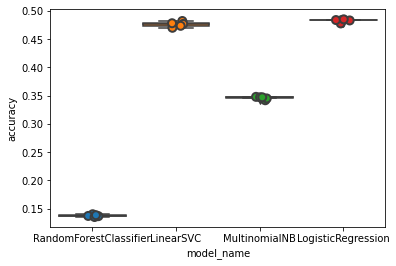

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
     MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

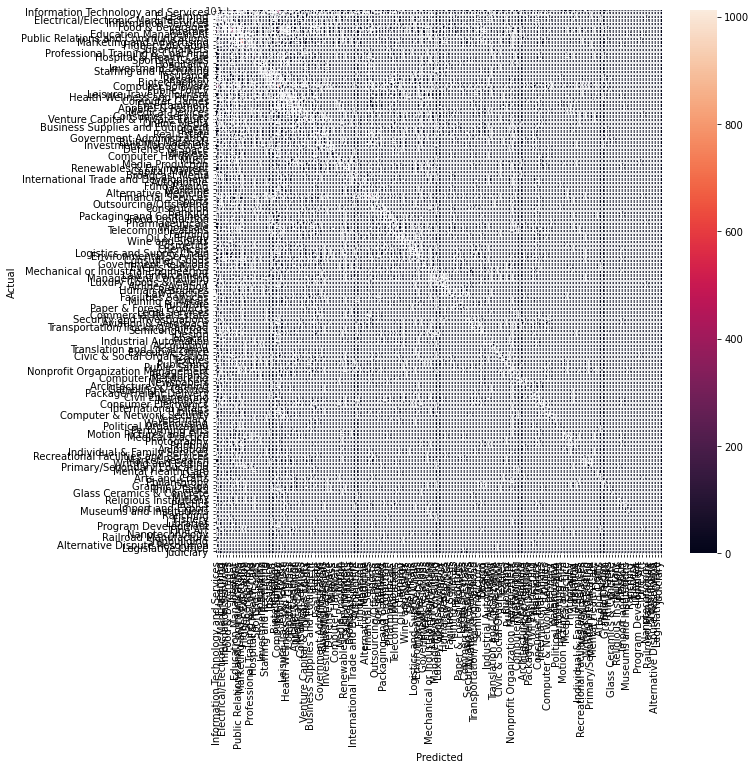

In [11]:
model = LinearSVC()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.company_industry.values, yticklabels=category_id_df.company_industry.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [13]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, target_names=df['company_industry'].unique()))

                                      precision    recall  f1-score   support

 Information Technology and Services       0.42      0.50      0.46      2008
                          E-Learning       0.41      0.51      0.45       123
 Electrical/Electronic Manufacturing       0.45      0.45      0.45       222
                Information Services       0.09      0.01      0.02        73
                    Food & Beverages       0.42      0.46      0.44       177
                            Internet       0.31      0.34      0.32      1077
                Education Management       0.45      0.35      0.39       208
 Public Relations and Communications       0.70      0.65      0.68        81
           Marketing and Advertising       0.54      0.67      0.60       916
                    Higher Education       0.56      0.68      0.61       161
                        Supermarkets       0.00      0.00      0.00         4
    Professional Training & Coaching       0.43      0.30      

/home/slintel/my_env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/slintel/my_env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/slintel/my_env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
